# Unsupervised Machine Learning

In [292]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as sm
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage

In [293]:
# Reading csv files
women = pd.read_csv('athletes-women.csv')
men = pd.read_csv('athletes-men.csv')

In [294]:
df_women = women[['athlete_id', 'rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_w = scale(df_women)
# X_w[0:10,]

df_men = men[['athlete_id', 'rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_m = scale(df_men)
# X_m[0:10,]

## Location

### Elbow Method

In [295]:
#What we want for location 
df_men_all = df_men.loc[:,['rank','latitude','longitude']]

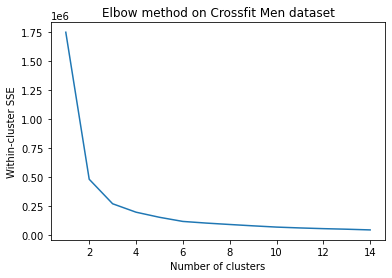

In [296]:
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_all)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Men dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### All Male Athletes

Text(0.5, 1.0, 'Clusters of All Male Locations')

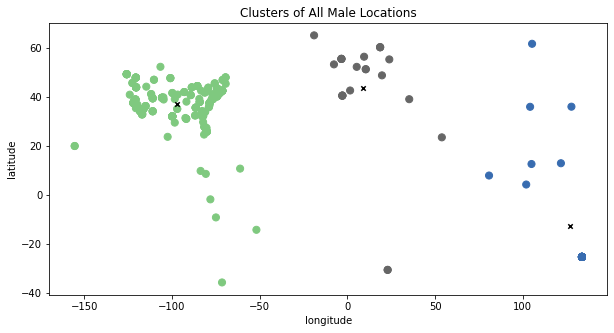

In [297]:
# Location men: All

num_clusters = 3 #Define number of clusters

#Call clustering algorithm 
clustering_mall = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mall.fit(df_men_all[df_men_all.columns[1:3]])
df_men_all['cluster_label'] = clustering_mall.fit_predict(df_men_all[df_men_all.columns[1:3]])

centers_mall = clustering_mall.cluster_centers_ # Coordinates of cluster centers.
labels_mall = clustering_mall.predict(df_men_all[df_men_all.columns[1:3]]) # Labels of each point

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_all['longitude'], y = df_men_all['latitude'], c=labels_mall, s=50, cmap='Accent')
plt.scatter(centers_mall[:,1] , centers_mall[:,0] , marker = "x", s = 20, color = 'k')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("Clusters of All Male Locations")


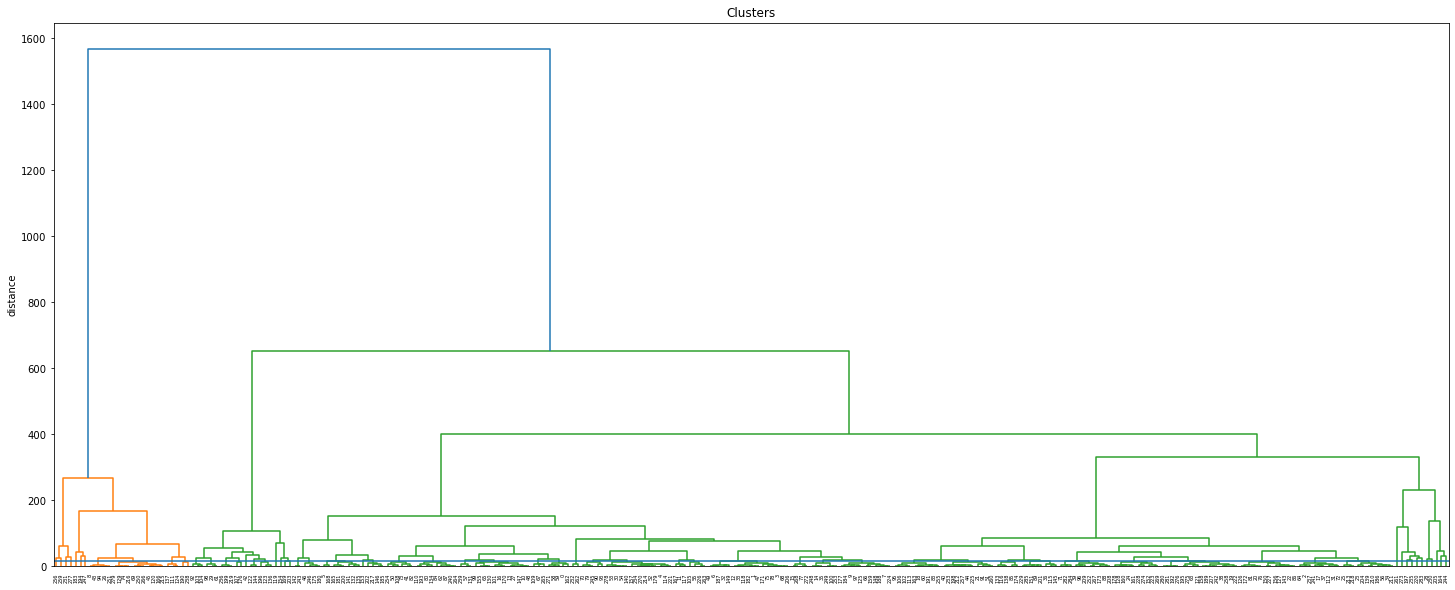

In [298]:
# Dendogram: All male athlete
Z = linkage(df_men_all,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()

### Male Athletes - US Only

In [299]:
# location men us
mask = (df_men['longitude'] >= -135) & (df_men['longitude'] <= -60) & (df_men['latitude'] >= 25) & (df_men['latitude'] <= 60) 

l = df_men.loc[mask]

df_men_us=l.loc[:,['rank','latitude','longitude']]


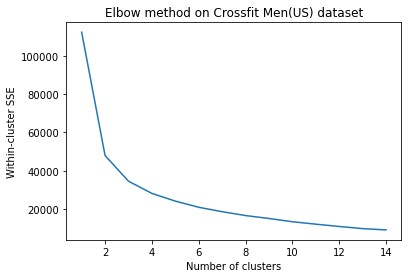

In [300]:
# Elbow method for male athletes from the US
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_us)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Men(US) dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[  37.71442292  -78.76126979]
 [  40.31992262 -118.68848571]
 [  37.52494419  -97.86626744]]


Text(0.5, 1.0, 'Clusters of US Male Locations')

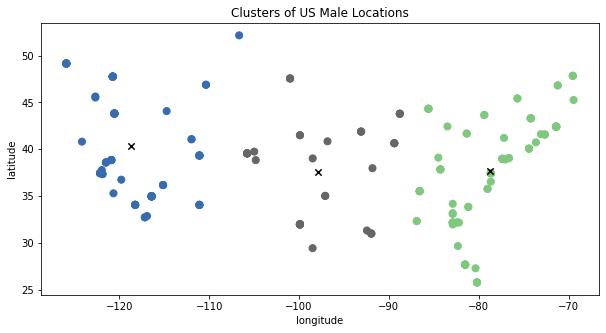

In [301]:
# Location men: US

num_clusters = 3 #Define number of clusters

#Call clustering algorithm 
clustering_mus = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mus.fit(df_men_us[df_men_us.columns[1:3]])
df_men_us['cluster_label'] = clustering_mus.fit_predict(df_men_us[df_men_us.columns[1:3]])

centers_mus = clustering_mus.cluster_centers_ # Coordinates of cluster centers.
labels_mus = clustering_mus.predict(df_men_us[df_men_us.columns[1:3]]) # Labels of each point
print(centers_mus)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_us['longitude'], y = df_men_us['latitude'], c=labels_mus, s=50, cmap='Accent')
plt.scatter(centers_mus[:,1] , centers_mus[:,0] , marker="x", s = 40, color = 'k')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("Clusters of US Male Locations")

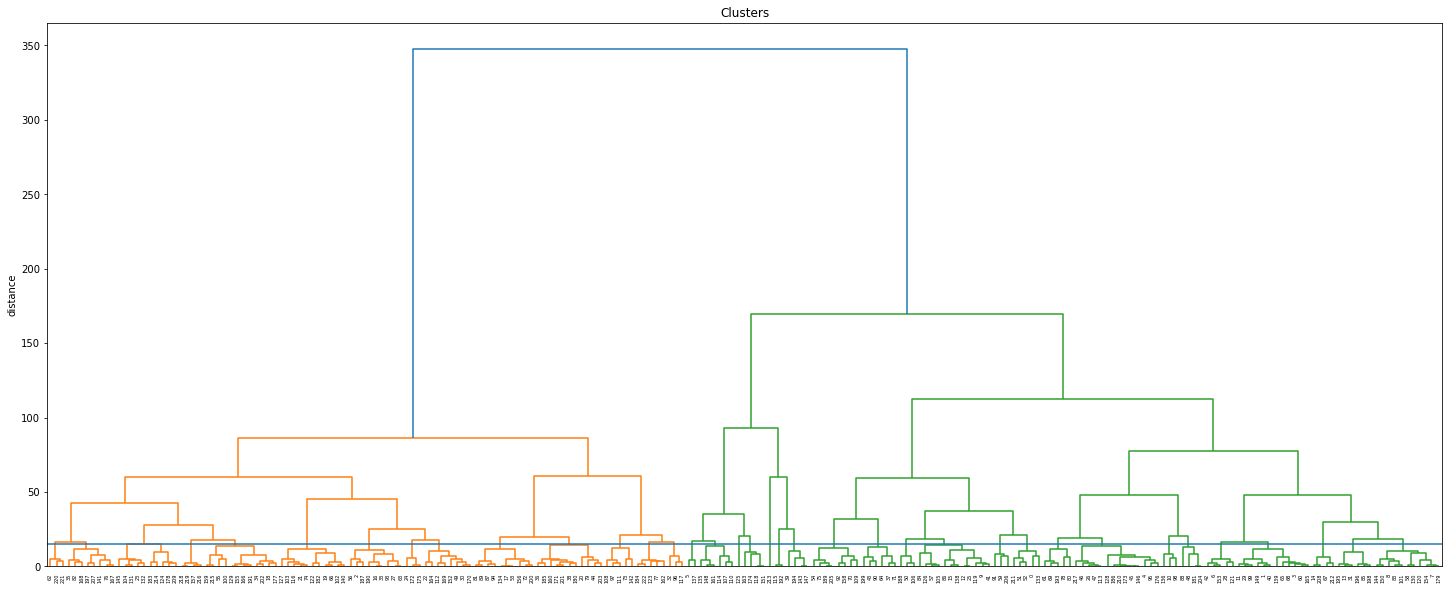

In [302]:
# Dendogram: Male athlete for US
Z = linkage(df_men_us,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()

## All Male Athletes

In [303]:
#What we want for location
df_women_all = df_women.loc[:,['rank','latitude','longitude']]

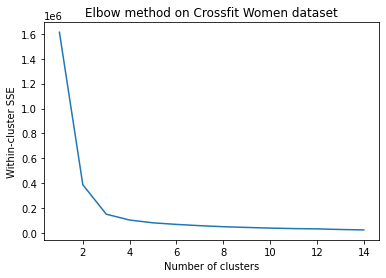

In [304]:
# Elbow method for Male athletes 
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_all)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Women dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[ 38.71361647 -95.72211824]
 [-22.98757407 134.59386296]
 [ 47.93828148   8.13688148]]


Text(0.5, 1.0, 'Clusters of All Male Locations')

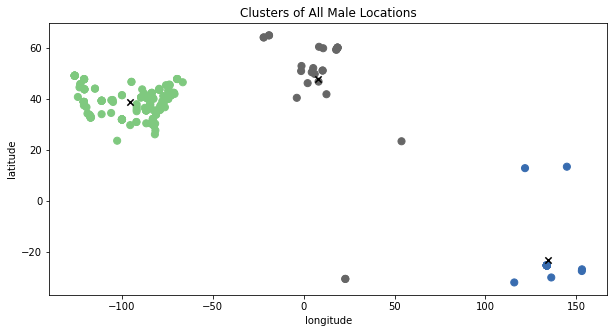

In [305]:
# Location women: All

num_clusters = 3 #Define number of clusters

#Call clustering algorithm 
clustering_wall = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wall.fit(df_women_all[df_women_all.columns[1:3]])
df_women_all['cluster_label'] = clustering_wall.fit_predict(df_women_all[df_women_all.columns[1:3]])

centers_wall = clustering_wall.cluster_centers_ # Coordinates of cluster centers.
labels_wall = clustering_wall.predict(df_women_all[df_women_all.columns[1:3]]) # Labels of each point
print(centers_wall)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_all['longitude'], y = df_women_all['latitude'], c=labels_wall, s=50, cmap='Accent')
plt.scatter(centers_wall[:,1] , centers_wall[:,0] , marker="x", s = 40, color = 'k')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("Clusters of All Male Locations")

### Male Athletes US Only

In [306]:
# location women us
mask = (df_women['longitude'] >= -135) & (df_women['longitude'] <= -60) & (df_women['latitude'] >= 25) & (df_women['latitude'] <= 60) #& (df_women['age'] <= 34) & (df_women['rank'] <= 50)

l = df_women.loc[mask]

df_women_us=l.loc[:,['rank','latitude','longitude']]

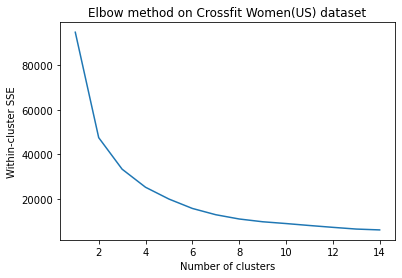

In [307]:
# Elbow method for Male athletes from the US
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_us)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Women(US) dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[  41.37867778 -119.67076296]
 [  38.40063908  -79.90776437]
 [  35.08486071  -98.42895   ]]


Text(0.5, 1.0, 'Clusters of US Male Locations')

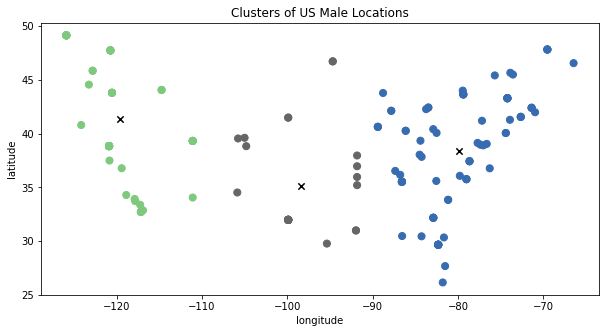

In [308]:
# Location women: US

num_clusters = 3 #Define number of clusters

#Call clustering algorithm 
clustering_wus = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wus.fit(df_women_us[df_women_us.columns[1:3]])
df_women_us['cluster_label'] = clustering_wus.fit_predict(df_women_us[df_women_us.columns[1:3]])

centers_wus = clustering_wus.cluster_centers_ # Coordinates of cluster centers.
labels_wus = clustering_wus.predict(df_women_us[df_women_us.columns[1:3]]) # Labels of each point
print(centers_wus)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_us['longitude'], y = df_women_us['latitude'], c=labels_wus, s=50, cmap='Accent')
plt.scatter(centers_wus[:,1] , centers_wus[:,0] , marker="x", s = 40, color = 'k')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("Clusters of US Male Locations")

# Clustering - Male Athletes

## Pullups

In [309]:
# Pullups
df_men_pull = df_men.loc[:,['age','rank','pullups']]

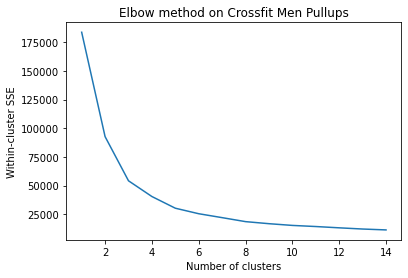

In [310]:
# Elbow method for Male athletes
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_pull)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Men Pullups')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### Pullups (All Age Groups)

[[107.8         38.        ]
 [  6.49677419  65.81935484]
 [ 23.50413223  50.80165289]]


Text(0.5, 1.0, 'Clusters of Male Pullups vs Rank')

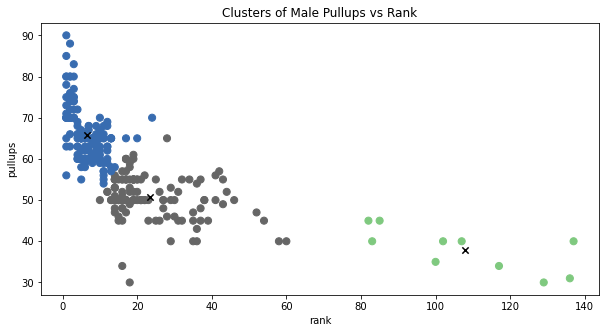

In [311]:
num_clusters = 3 #Define number of clusters

#Call clustering algorithm 
clustering_mpull = KMeans(n_clusters=num_clusters, random_state=2)
clustering_mpull.fit(df_men_pull[df_men_pull.columns[1:3]])
df_men_pull['cluster_label'] = clustering_mpull.fit_predict(df_men_pull[df_men_pull.columns[1:3]])
df_men_pull

centers_mpull = clustering_mpull.cluster_centers_ # Coordinates of cluster centers.
labels_mpull = clustering_mpull.predict(df_men_pull[df_men_pull.columns[1:3]]) # Labels of each point
print(centers_mpull)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_pull['rank'], y = df_men_pull['pullups'], c=labels_mpull, s=50, cmap='Accent')
plt.scatter(centers_mpull[:,0] , centers_mpull[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Male Pullups vs Rank")

### Aggregate Men by age groups

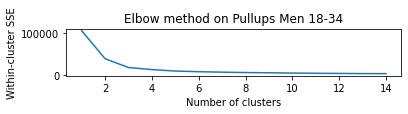

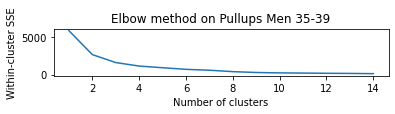

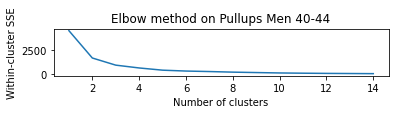

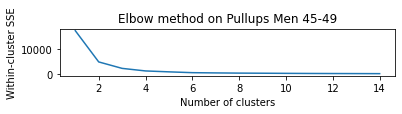

In [312]:
# Aggregation 18-34
mask = (df_men_pull['age'] >= 18) & (df_men_pull['age'] <= 34)
df_men_pull1 = df_men_pull.loc[mask]

#Elbow 18-34
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_pull1)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,1)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Pullups Men 18-34')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 34-39
mask = (df_men_pull['age'] >= 35) & (df_men_pull['age'] <= 39)
df_men_pull2 = df_men_pull.loc[mask]

#Elbow 35-39
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_pull2)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,2)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Pullups Men 35-39')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 40-44
mask = (df_men_pull['age'] >= 40) & (df_men_pull['age'] <= 44)
df_men_pull3 = df_men_pull.loc[mask]

#Elbow 40-44
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_pull3)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,3)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Pullups Men 40-44')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 45-49
mask = (df_men_pull['age'] >= 45) & (df_men_pull['age'] <= 49)
df_men_pull4 = df_men_pull.loc[mask]

#Elbow 45-49
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_pull4)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,4)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Pullups Men 45-49')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[ 34.08510638  48.61702128]
 [ 10.34210526  60.88157895]
 [106.77777778  38.44444444]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/2284370014.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_pull1['cluster_label'] = clustering_mpull1.fit_predict(df_men_pull1[df_men_pull1.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Pullups vs Rank 18-34')

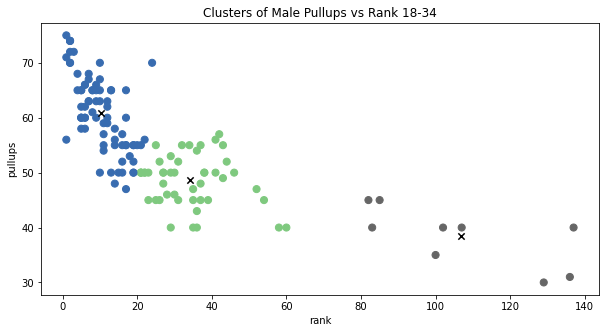

In [313]:
num_clusters = 3 #Define number of clusters

#Age 18-34
#Call clustering algorithm 
clustering_mpull1 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mpull1.fit(df_men_pull1[df_men_pull1.columns[1:3]])
df_men_pull1['cluster_label'] = clustering_mpull1.fit_predict(df_men_pull1[df_men_pull1.columns[1:3]])

centers_mpull1 = clustering_mpull1.cluster_centers_ # Coordinates of cluster centers.
labels_mpull1 = clustering_mpull1.predict(df_men_pull1[df_men_pull1.columns[1:3]]) # Labels of each point
print(centers_mpull1)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_pull1['rank'], y = df_men_pull1['pullups'], c=labels_mpull1, s=50, cmap='Accent')
plt.scatter(centers_mpull1[:,0] , centers_mpull1[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Male Pullups vs Rank 18-34")

[[ 2.         76.        ]
 [18.5        51.75      ]
 [ 8.         62.82352941]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/1773388535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_pull2['cluster_label'] = clustering_mpull2.fit_predict(df_men_pull2[df_men_pull2.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Pullups vs Rank 35-39')

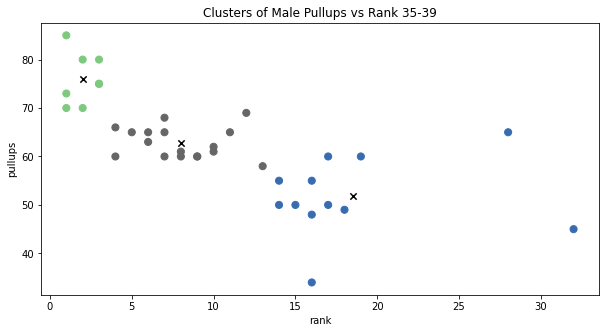

In [314]:
#Age 35-39
#Call clustering algorithm 
clustering_mpull2 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mpull2.fit(df_men_pull2[df_men_pull2.columns[1:3]])
df_men_pull2['cluster_label'] = clustering_mpull2.fit_predict(df_men_pull2[df_men_pull2.columns[1:3]])

centers_mpull2 = clustering_mpull2.cluster_centers_ # Coordinates of cluster centers.
labels_mpull2 = clustering_mpull2.predict(df_men_pull2[df_men_pull2.columns[1:3]]) # Labels of each point
print(centers_mpull2)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_pull2['rank'], y = df_men_pull2['pullups'], c=labels_mpull2, s=50, cmap='Accent')
plt.scatter(centers_mpull2[:,0] , centers_mpull2[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Male Pullups vs Rank 35-39")

[[16.         53.6875    ]
 [ 5.88888889 65.        ]
 [ 1.33333333 82.        ]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/912221379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_pull3['cluster_label'] = clustering_mpull3.fit_predict(df_men_pull3[df_men_pull3.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Pullups vs Rank 40-44')

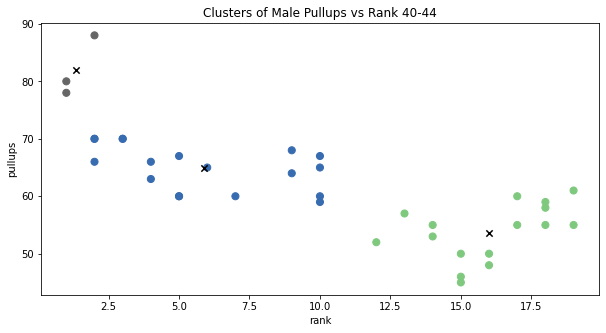

In [315]:
#Age 40-44
#Call clustering algorithm 
clustering_mpull3 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mpull3.fit(df_men_pull3[df_men_pull3.columns[1:3]])
df_men_pull3['cluster_label'] = clustering_mpull3.fit_predict(df_men_pull3[df_men_pull3.columns[1:3]])

centers_mpull3 = clustering_mpull3.cluster_centers_ # Coordinates of cluster centers.
labels_mpull3 = clustering_mpull3.predict(df_men_pull3[df_men_pull3.columns[1:3]]) # Labels of each point
print(centers_mpull3)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_pull3['rank'], y = df_men_pull3['pullups'], c=labels_mpull3, s=50, cmap='Accent')
plt.scatter(centers_mpull3[:,0] , centers_mpull3[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Male Pullups vs Rank 40-44")

[[ 10.16129032  59.48387097]
 [117.          34.        ]
 [  2.25        74.83333333]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/4136636443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_pull4['cluster_label'] = clustering_mpull4.fit_predict(df_men_pull4[df_men_pull4.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Pullups vs Rank 45-49')

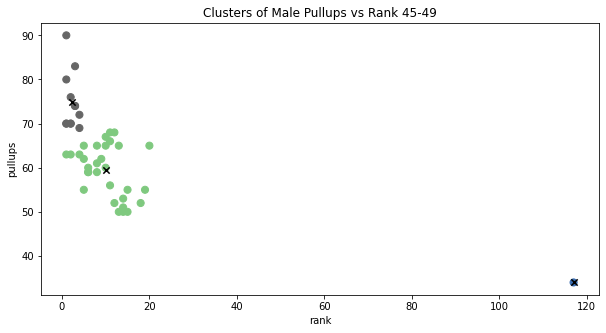

In [316]:
#Age 45-49
#Call clustering algorithm 
clustering_mpull4 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mpull4.fit(df_men_pull4[df_men_pull4.columns[1:3]])
df_men_pull4['cluster_label'] = clustering_mpull4.fit_predict(df_men_pull4[df_men_pull4.columns[1:3]])

centers_mpull4 = clustering_mpull4.cluster_centers_ # Coordinates of cluster centers.
labels_mpull4 = clustering_mpull4.predict(df_men_pull4[df_men_pull4.columns[1:3]]) # Labels of each point
print(centers_mpull4)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_pull4['rank'], y = df_men_pull4['pullups'], c=labels_mpull4, s=50, cmap='Accent')
plt.scatter(centers_mpull4[:,0] , centers_mpull4[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Male Pullups vs Rank 45-49")

## Fran

In [317]:
# Pullups
df_men_fran = df_men.loc[:,['age','rank','fran']]

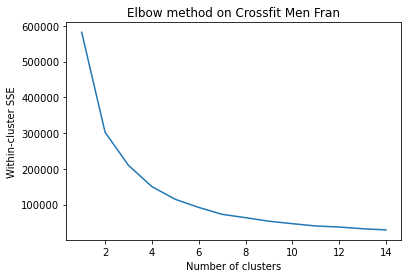

In [318]:
# Elbow method for Male athletes 
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_fran)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Men Fran')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### Fran (All Age Groups)

[[ 20.66972477 192.83486239]
 [ 11.425      144.6125    ]
 [ 49.88235294 273.17647059]]


Text(0.5, 1.0, 'Clusters of Male Fran time vs Rank')

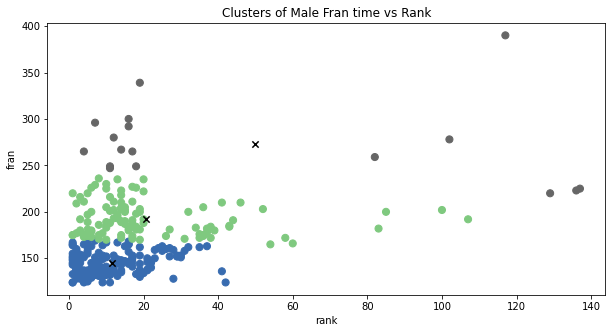

In [319]:
num_clusters = 3 #Define number of clusters

#Call clustering algorithm 
clustering_mfran = KMeans(n_clusters=num_clusters, random_state=2)
clustering_mfran.fit(df_men_fran[df_men_fran.columns[1:3]])
df_men_fran['cluster_label'] = clustering_mfran.fit_predict(df_men_fran[df_men_fran.columns[1:3]])

centers_mfran = clustering_mfran.cluster_centers_ # Coordinates of cluster centers.
labels_mfran = clustering_mfran.predict(df_men_fran[df_men_fran.columns[1:3]]) # Labels of each point
print(centers_mfran)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_fran['rank'], y = df_men_fran['fran'], c=labels_mfran, s=50, cmap='Accent')
plt.scatter(centers_mfran[:,0] , centers_mfran[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Male Fran time vs Rank")

### Aggregate Men by age groups

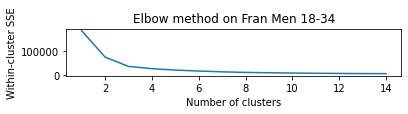

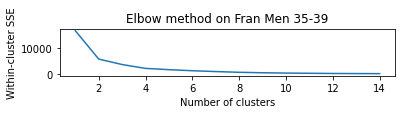

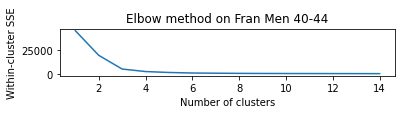

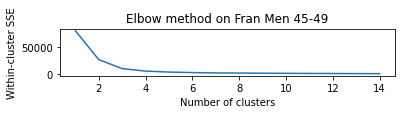

In [320]:
# Aggregation 18-34
mask = (df_men_fran['age'] >= 18) & (df_men_fran['age'] <= 34)
df_men_fran1 = df_men_fran.loc[mask]

#Elbow 18-34
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_fran1)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,1)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Fran Men 18-34')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 34-39
mask = (df_men_fran['age'] >= 35) & (df_men_fran['age'] <= 39)
df_men_fran2 = df_men_fran.loc[mask]

#Elbow 35-39
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_fran2)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,2)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Fran Men 35-39')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 40-44
mask = (df_men_fran['age'] >= 40) & (df_men_fran['age'] <= 44)
df_men_fran3 = df_men_fran.loc[mask]

#Elbow 40-44
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_fran3)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,3)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Fran Men 40-44')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 45-49
mask = (df_men_fran['age'] >= 45) & (df_men_fran['age'] <= 49)
df_men_fran4 = df_men_fran.loc[mask]

#Elbow 45-49
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_fran4)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,4)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Fran Men 45-49')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[ 38.60606061 176.48484848]
 [ 13.15384615 139.26373626]
 [109.75       224.875     ]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/2650124153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_fran1['cluster_label'] = clustering_mfran1.fit_predict(df_men_fran1[df_men_fran1.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Fran time vs Rank 18-34')

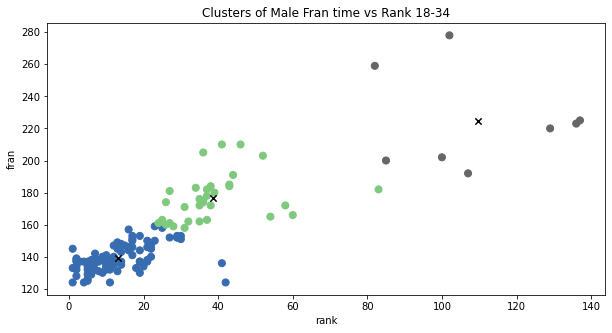

In [321]:
num_clusters = 3 #Define number of clusters

#Age 18-34
#Call clustering algorithm 
clustering_mfran1 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mfran1.fit(df_men_fran1[df_men_fran1.columns[1:3]])
df_men_fran1['cluster_label'] = clustering_mfran1.fit_predict(df_men_fran1[df_men_fran1.columns[1:3]])

centers_mfran1 = clustering_mfran1.cluster_centers_ # Coordinates of cluster centers.
labels_mfran1 = clustering_mfran1.predict(df_men_fran1[df_men_fran1.columns[1:3]]) # Labels of each point
print(centers_mfran1)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_fran1['rank'], y = df_men_fran1['fran'], c=labels_mfran1, s=50, cmap='Accent')
plt.scatter(centers_mfran1[:,0] , centers_mfran1[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Male Fran time vs Rank 18-34")

[[ 2.         76.        ]
 [18.5        51.75      ]
 [ 8.         62.82352941]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/2910430832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_fran2['cluster_label'] = clustering_mfran2.fit_predict(df_men_fran2[df_men_fran2.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Fran times vs Rank 35-39')

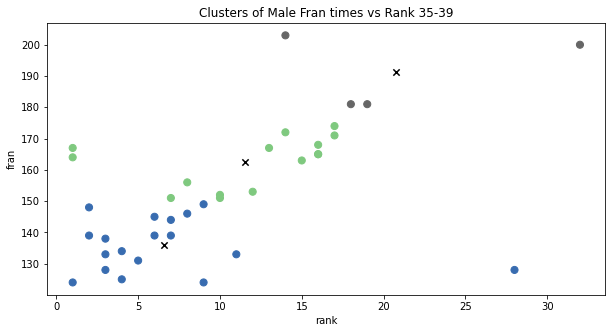

In [322]:
#Age 35-39
#Call clustering algorithm 
clustering_mfran2 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mfran2.fit(df_men_fran2[df_men_fran2.columns[1:3]])
df_men_fran2['cluster_label'] = clustering_mfran2.fit_predict(df_men_fran2[df_men_fran2.columns[1:3]])

centers_mfran2 = clustering_mfran2.cluster_centers_ # Coordinates of cluster centers.
labels_mfran2 = clustering_mfran2.predict(df_men_fran2[df_men_fran2.columns[1:3]]) # Labels of each point
print(centers_mpull2)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_fran2['rank'], y = df_men_fran2['fran'], c=labels_mfran2, s=50, cmap='Accent')
plt.scatter(centers_mfran2[:,0] , centers_mfran2[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Male Fran times vs Rank 35-39")

[[16.         53.6875    ]
 [ 5.88888889 65.        ]
 [ 1.33333333 82.        ]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/4089024665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_fran3['cluster_label'] = clustering_mfran3.fit_predict(df_men_fran3[df_men_fran3.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Fran Times vs Rank 40-44')

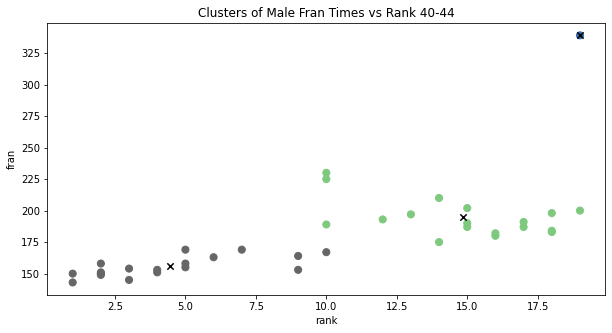

In [323]:
#Age 40-44
#Call clustering algorithm 
clustering_mfran3 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mfran3.fit(df_men_fran3[df_men_fran3.columns[1:3]])
df_men_fran3['cluster_label'] = clustering_mfran3.fit_predict(df_men_fran3[df_men_fran3.columns[1:3]])

centers_mfran3 = clustering_mfran3.cluster_centers_ # Coordinates of cluster centers.
labels_mfran3 = clustering_mfran3.predict(df_men_fran3[df_men_fran3.columns[1:3]]) # Labels of each point
print(centers_mpull3)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_fran3['rank'], y = df_men_fran3['fran'], c=labels_mfran3, s=50, cmap='Accent')
plt.scatter(centers_mfran3[:,0] , centers_mfran3[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Male Fran Times vs Rank 40-44")

/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/2558443495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_fran4['cluster_label'] = clustering_mfran4.fit_predict(df_men_fran4[df_men_fran4.columns[1:3]])


[[ 10.16129032  59.48387097]
 [117.          34.        ]
 [  2.25        74.83333333]]


Text(0.5, 1.0, 'Clusters of Male Fran time vs Rank 45-49')

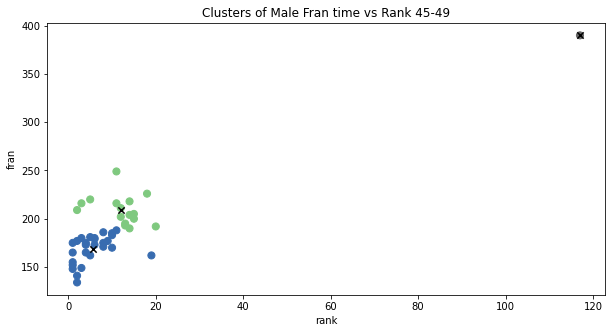

In [324]:
#Age 45-49
#Call clustering algorithm 
clustering_mfran4 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mfran4.fit(df_men_fran4[df_men_fran4.columns[1:3]])
df_men_fran4['cluster_label'] = clustering_mfran4.fit_predict(df_men_fran4[df_men_fran4.columns[1:3]])

centers_mfran4 = clustering_mfran4.cluster_centers_ # Coordinates of cluster centers.
labels_mfran4 = clustering_mfran4.predict(df_men_fran4[df_men_fran4.columns[1:3]]) # Labels of each point
print(centers_mpull4)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_fran4['rank'], y = df_men_fran4['fran'], c=labels_mfran4, s=50, cmap='Accent')
plt.scatter(centers_mfran4[:,0] , centers_mfran4[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Male Fran time vs Rank 45-49")

## Run5k

In [325]:
# Run5k
df_men_run = df_men.loc[:,['age','rank','run5k']]

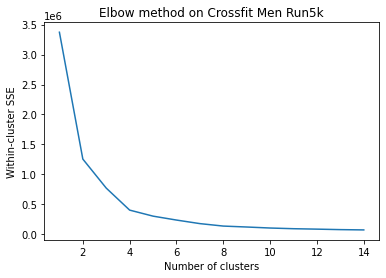

In [326]:
# Elbow method for Male athletes 
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_run)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Men Run5k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### Run5k (All Age Groups)

[[  32.6744186  1414.8372093 ]
 [   8.03603604 1194.53153153]
 [  13.30081301 1274.57723577]
 [ 110.66666667 1655.66666667]]


Text(0.5, 1.0, 'Clusters of Male Run5k time vs Rank')

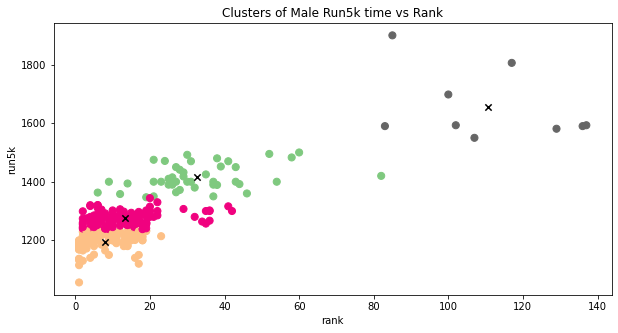

In [327]:
num_clusters = 4 #Define number of clusters

#Call clustering algorithm 
clustering_mrun = KMeans(n_clusters=num_clusters, random_state=2)
clustering_mrun.fit(df_men_run[df_men_run.columns[1:3]])
df_men_run['cluster_label'] = clustering_mrun.fit_predict(df_men_run[df_men_run.columns[1:3]])

centers_mrun = clustering_mrun.cluster_centers_ # Coordinates of cluster centers.
labels_mrun = clustering_mrun.predict(df_men_run[df_men_run.columns[1:3]]) # Labels of each point
print(centers_mrun)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_run['rank'], y = df_men_run['run5k'], c=labels_mrun, s=50, cmap='Accent')
plt.scatter(centers_mrun[:,0] , centers_mrun[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5k')
plt.title("Clusters of Male Run5k time vs Rank")

### Aggregate Men by age groups

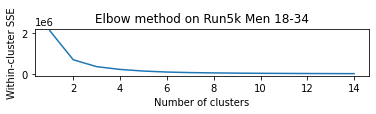

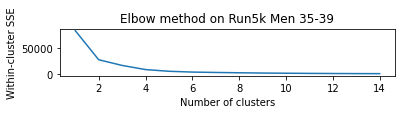

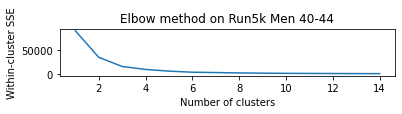

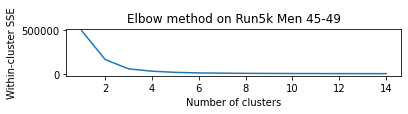

In [328]:
# Aggregation 18-34
mask = (df_men_run['age'] >= 18) & (df_men_run['age'] <= 34)
df_men_run1 = df_men_run.loc[mask]

#Elbow 18-34
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_run1)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,1)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Run5k Men 18-34')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 34-39
mask = (df_men_run['age'] >= 35) & (df_men_run['age'] <= 39)
df_men_run2 = df_men_run.loc[mask]

#Elbow 35-39
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_run2)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,2)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Run5k Men 35-39')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 40-44
mask = (df_men_run['age'] >= 40) & (df_men_run['age'] <= 44)
df_men_run3 = df_men_run.loc[mask]

#Elbow 40-44
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_run3)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,3)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Run5k Men 40-44')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 45-49
mask = (df_men_run['age'] >= 45) & (df_men_run['age'] <= 49)
df_men_run4 = df_men_run.loc[mask]

#Elbow 45-49
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_run4)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,4)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Run5k Men 45-49')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[  35.59459459 1421.72972973]
 [  13.25287356 1244.4137931 ]
 [ 109.875      1636.875     ]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/292168544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_run1['cluster_label'] = clustering_mrun1.fit_predict(df_men_run1[df_men_run1.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Run5k vs Rank 18-34')

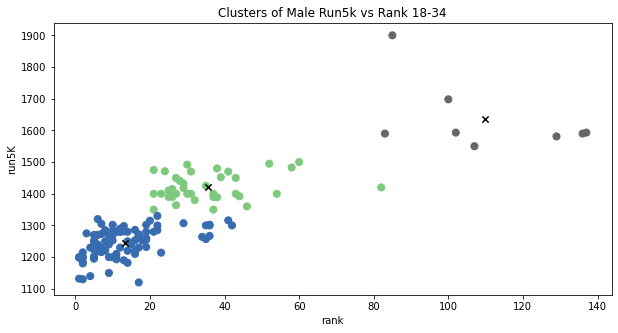

In [329]:
num_clusters = 3 #Define number of clusters

#Age 18-34
#Call clustering algorithm 
clustering_mrun1 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mrun1.fit(df_men_run1[df_men_run1.columns[1:3]])
df_men_run1['cluster_label'] = clustering_mrun1.fit_predict(df_men_run1[df_men_run1.columns[1:3]])

centers_mrun1 = clustering_mrun1.cluster_centers_ # Coordinates of cluster centers.
labels_mrun1 = clustering_mrun1.predict(df_men_run1[df_men_run1.columns[1:3]]) # Labels of each point
print(centers_mrun1)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_run1['rank'], y = df_men_run1['run5k'], c=labels_mrun1, s=50, cmap='Accent')
plt.scatter(centers_mrun1[:,0] , centers_mrun1[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5K')
plt.title("Clusters of Male Run5k vs Rank 18-34")

[[  10.5        1235.08333333]
 [  12.3125     1287.0625    ]
 [   5.66666667 1180.77777778]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/3177543841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_run2['cluster_label'] = clustering_mrun2.fit_predict(df_men_run2[df_men_run2.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Run 5k vs Rank 35-39')

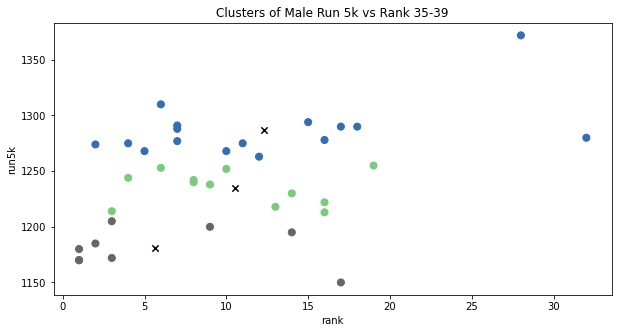

In [330]:
#Age 35-39
#Call clustering algorithm 
clustering_mrun2 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mrun2.fit(df_men_run2[df_men_run2.columns[1:3]])
df_men_run2['cluster_label'] = clustering_mrun2.fit_predict(df_men_run2[df_men_run2.columns[1:3]])

centers_mrun2 = clustering_mrun2.cluster_centers_ # Coordinates of cluster centers.
labels_mrun2 = clustering_mrun2.predict(df_men_run2[df_men_run2.columns[1:3]]) # Labels of each point
print(centers_mrun2)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_run2['rank'], y = df_men_run2['run5k'], c=labels_mrun2, s=50, cmap='Accent')
plt.scatter(centers_mrun2[:,0] , centers_mrun2[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5k')
plt.title("Clusters of Male Run 5k vs Rank 35-39")

[[1.17647059e+01 1.26705882e+03]
 [8.68421053e+00 1.19684211e+03]
 [1.00000000e+00 1.05600000e+03]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/3256270125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_run3['cluster_label'] = clustering_mrun3.fit_predict(df_men_run3[df_men_run3.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male Run5k vs Rank 40-44')

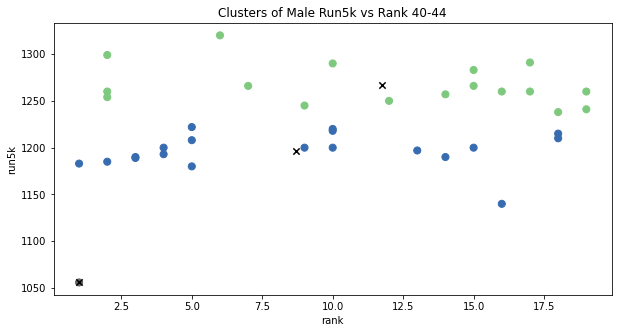

In [331]:
#Age 40-44
#Call clustering algorithm 
clustering_mrun3 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mrun3.fit(df_men_run3[df_men_run3.columns[1:3]])
df_men_run3['cluster_label'] = clustering_mrun3.fit_predict(df_men_run3[df_men_run3.columns[1:3]])

centers_mrun3 = clustering_mrun3.cluster_centers_ # Coordinates of cluster centers.
labels_mrun3 = clustering_mrun3.predict(df_men_run3[df_men_run3.columns[1:3]]) # Labels of each point
print(centers_mrun3)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_run3['rank'], y = df_men_run3['run5k'], c=labels_mrun3, s=50, cmap='Accent')
plt.scatter(centers_mrun3[:,0] , centers_mrun3[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5k')
plt.title("Clusters of Male Run5k vs Rank 40-44")

[[   7.39285714 1198.92857143]
 [ 117.         1806.        ]
 [   9.         1303.73333333]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/3908549366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_run4['cluster_label'] = clustering_mpull4.fit_predict(df_men_run4[df_men_run4.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Male run5k vs Rank 45-49')

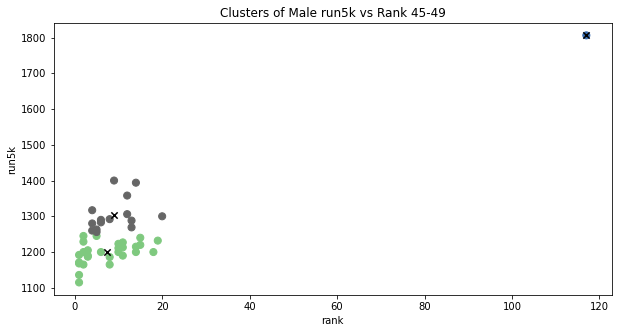

In [332]:
#Age 45-49
#Call clustering algorithm 
clustering_mrun4 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_mrun4.fit(df_men_run4[df_men_run4.columns[1:3]])
df_men_run4['cluster_label'] = clustering_mpull4.fit_predict(df_men_run4[df_men_run4.columns[1:3]])

centers_mrun4 = clustering_mrun4.cluster_centers_ # Coordinates of cluster centers.
labels_mrun4 = clustering_mrun4.predict(df_men_run4[df_men_run4.columns[1:3]]) # Labels of each point
print(centers_mrun4)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_men_run4['rank'], y = df_men_run4['run5k'], c=labels_mrun4, s=50, cmap='Accent')
plt.scatter(centers_mrun4[:,0] , centers_mrun4[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5k')
plt.title("Clusters of Male run5k vs Rank 45-49")

# Clustering - Female Athletes

## Pullups

In [333]:
# Pullups
df_women_pull = df_women.loc[:,['age','rank','pullups']]

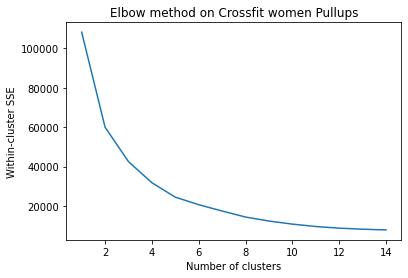

In [334]:
# Elbow method for Female athletes
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_pull)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit women Pullups')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### Pullups (All Age Groups)

[[33.51282051 33.12820513]
 [ 9.74301676 45.94972067]
 [91.83333333 26.66666667]]


Text(0.5, 1.0, 'Clusters of Female Pullups vs Rank')

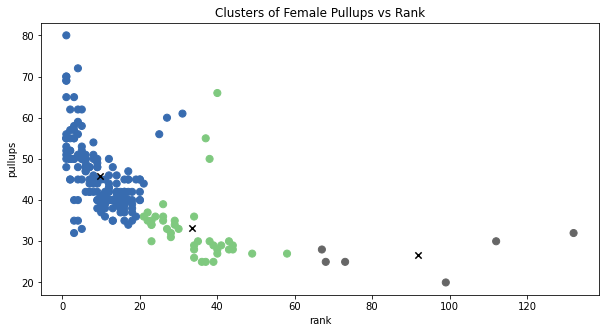

In [335]:
num_clusters = 3 #Define number of clusters

#Call clustering algorithm 
clustering_wpull = KMeans(n_clusters=num_clusters, random_state=2)
clustering_wpull.fit(df_women_pull[df_women_pull.columns[1:3]])
df_women_pull['cluster_label'] = clustering_wpull.fit_predict(df_women_pull[df_women_pull.columns[1:3]])
df_women_pull

centers_wpull = clustering_wpull.cluster_centers_ # Coordinates of cluster centers.
labels_wpull = clustering_wpull.predict(df_women_pull[df_women_pull.columns[1:3]]) # Labels of each point
print(centers_wpull)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_pull['rank'], y = df_women_pull['pullups'], c=labels_wpull, s=50, cmap='Accent')
plt.scatter(centers_wpull[:,0] , centers_wpull[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Female Pullups vs Rank")

### Aggregate women by age groups

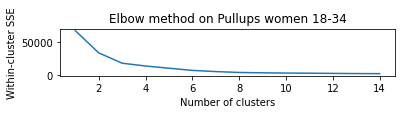

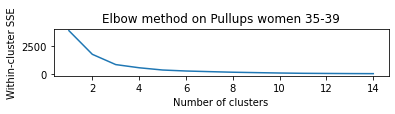

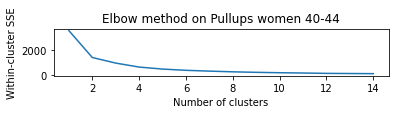

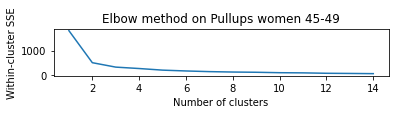

In [336]:
# Aggregation 18-34
mask = (df_women_pull['age'] >= 18) & (df_women_pull['age'] <= 34)
df_women_pull1 = df_women_pull.loc[mask]

#Elbow 18-34
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_pull1)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,1)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Pullups women 18-34')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 34-39
mask = (df_women_pull['age'] >= 35) & (df_women_pull['age'] <= 39)
df_women_pull2 = df_women_pull.loc[mask]

#Elbow 35-39
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_pull2)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,2)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Pullups women 35-39')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 40-44
mask = (df_women_pull['age'] >= 40) & (df_women_pull['age'] <= 44)
df_women_pull3 = df_women_pull.loc[mask]

#Elbow 40-44
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_pull3)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,3)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Pullups women 40-44')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 45-49
mask = (df_women_pull['age'] >= 45) & (df_women_pull['age'] <= 49)
df_women_pull4 = df_women_pull.loc[mask]

#Elbow 45-49
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_pull4)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,4)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Pullups women 45-49')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[10.11111111 47.49206349]
 [33.54054054 33.18918919]
 [91.83333333 26.66666667]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/1279928914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_pull1['cluster_label'] = clustering_wpull1.fit_predict(df_women_pull1[df_women_pull1.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female Pullups vs Rank 18-34')

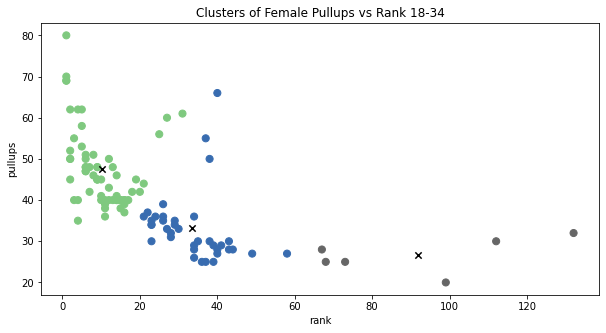

In [337]:
num_clusters = 3 #Define number of clusters

#Age 18-34
#Call clustering algorithm 
clustering_wpull1 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wpull1.fit(df_women_pull1[df_women_pull1.columns[1:3]])
df_women_pull1['cluster_label'] = clustering_wpull1.fit_predict(df_women_pull1[df_women_pull1.columns[1:3]])

centers_wpull1 = clustering_wpull1.cluster_centers_ # Coordinates of cluster centers.
labels_wpull1 = clustering_wpull1.predict(df_women_pull1[df_women_pull1.columns[1:3]]) # Labels of each point
print(centers_wpull1)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_pull1['rank'], y = df_women_pull1['pullups'], c=labels_wpull1, s=50, cmap='Accent')
plt.scatter(centers_wpull1[:,0] , centers_wpull1[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Female Pullups vs Rank 18-34")

[[14.38461538 41.23076923]
 [ 2.875      55.375     ]
 [44.         29.        ]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/935394109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_pull2['cluster_label'] = clustering_wpull2.fit_predict(df_women_pull2[df_women_pull2.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female Pullups vs Rank 35-39')

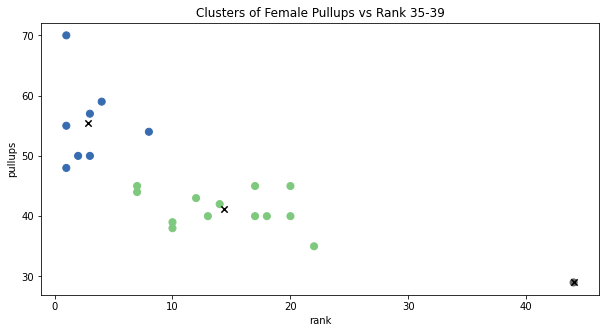

In [338]:
#Age 35-39
#Call clustering algorithm 
clustering_wpull2 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wpull2.fit(df_women_pull2[df_women_pull2.columns[1:3]])
df_women_pull2['cluster_label'] = clustering_wpull2.fit_predict(df_women_pull2[df_women_pull2.columns[1:3]])

centers_wpull2 = clustering_wpull2.cluster_centers_ # Coordinates of cluster centers.
labels_wpull2 = clustering_wpull2.predict(df_women_pull2[df_women_pull2.columns[1:3]]) # Labels of each point
print(centers_wpull2)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_pull2['rank'], y = df_women_pull2['pullups'], c=labels_wpull2, s=50, cmap='Accent')
plt.scatter(centers_wpull2[:,0] , centers_wpull2[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Female Pullups vs Rank 35-39")

/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/1862713289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_pull3['cluster_label'] = clustering_wpull3.fit_predict(df_women_pull3[df_women_pull3.columns[1:3]])


[[15.29411765 40.23529412]
 [ 3.57142857 52.71428571]
 [ 7.38461538 40.84615385]]


Text(0.5, 1.0, 'Clusters of Female Pullups vs Rank 40-44')

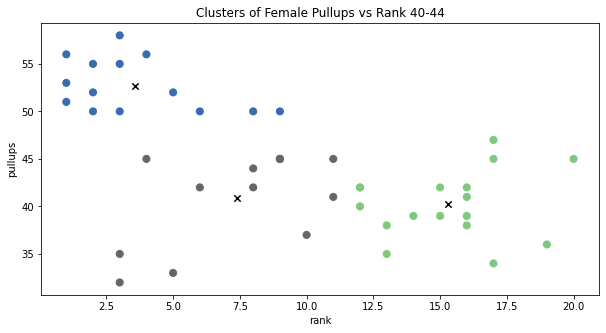

In [339]:
#Age 40-44
#Call clustering algorithm 
clustering_wpull3 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wpull3.fit(df_women_pull3[df_women_pull3.columns[1:3]])
df_women_pull3['cluster_label'] = clustering_wpull3.fit_predict(df_women_pull3[df_women_pull3.columns[1:3]])

centers_wpull3 = clustering_wpull3.cluster_centers_ # Coordinates of cluster centers.
labels_wpull3 = clustering_wpull3.predict(df_women_pull3[df_women_pull3.columns[1:3]]) # Labels of each point
print(centers_wpull3)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_pull3['rank'], y = df_women_pull3['pullups'], c=labels_wpull3, s=50, cmap='Accent')
plt.scatter(centers_wpull3[:,0] , centers_wpull3[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Female Pullups vs Rank 40-44")

[[ 4.3  49.6 ]
 [16.7  37.9 ]
 [11.25 41.25]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/1358529072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_pull4['cluster_label'] = clustering_wpull4.fit_predict(df_women_pull4[df_women_pull4.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female Pullups vs Rank 45-49')

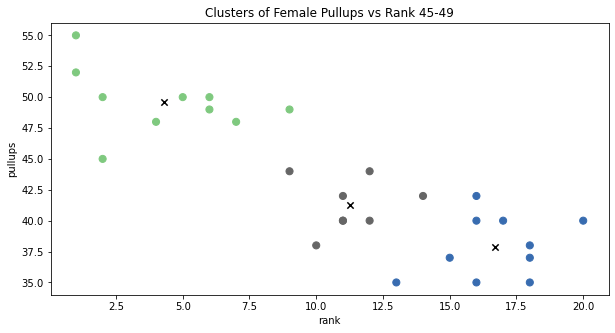

In [340]:
#Age 45-49
#Call clustering algorithm 
clustering_wpull4 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wpull4.fit(df_women_pull4[df_women_pull4.columns[1:3]])
df_women_pull4['cluster_label'] = clustering_wpull4.fit_predict(df_women_pull4[df_women_pull4.columns[1:3]])

centers_wpull4 = clustering_wpull4.cluster_centers_ # Coordinates of cluster centers.
labels_wpull4 = clustering_wpull4.predict(df_women_pull4[df_women_pull4.columns[1:3]]) # Labels of each point
print(centers_wpull4)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_pull4['rank'], y = df_women_pull4['pullups'], c=labels_wpull4, s=50, cmap='Accent')
plt.scatter(centers_wpull4[:,0] , centers_wpull4[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('pullups')
plt.title("Clusters of Female Pullups vs Rank 45-49")

## Fran

In [341]:
# Pullups
df_women_fran = df_women.loc[:,['age','rank','fran']]

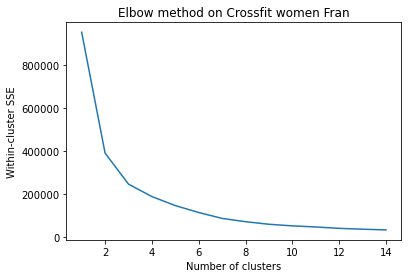

In [342]:
# Elbow method for Female athletes 
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_fran)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit women Fran')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### Fran (All Age Groups)

[[ 15.84       219.66666667]
 [ 14.26446281 158.14876033]
 [ 24.57142857 327.78571429]]


Text(0.5, 1.0, 'Clusters of Female Fran time vs Rank')

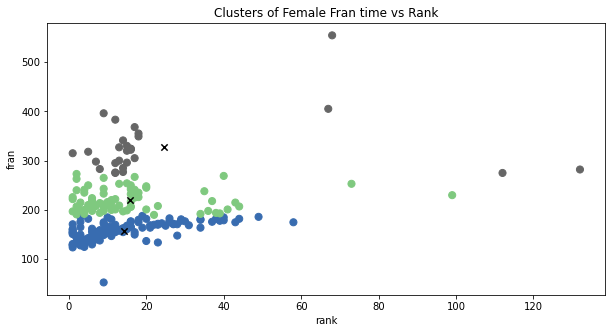

In [343]:
num_clusters = 3 #Define number of clusters

#Call clustering algorithm 
clustering_wfran = KMeans(n_clusters=num_clusters, random_state=2)
clustering_wfran.fit(df_women_fran[df_women_fran.columns[1:3]])
df_women_fran['cluster_label'] = clustering_wfran.fit_predict(df_women_fran[df_women_fran.columns[1:3]])

centers_wfran = clustering_wfran.cluster_centers_ # Coordinates of cluster centers.
labels_wfran = clustering_wfran.predict(df_women_fran[df_women_fran.columns[1:3]]) # Labels of each point
print(centers_wfran)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_fran['rank'], y = df_women_fran['fran'], c=labels_wfran, s=50, cmap='Accent')
plt.scatter(centers_wfran[:,0] , centers_wfran[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Female Fran time vs Rank")

### Aggregate women by age groups

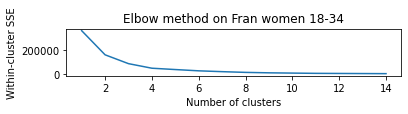

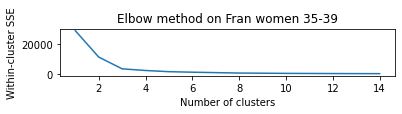

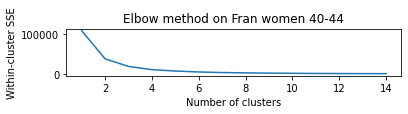

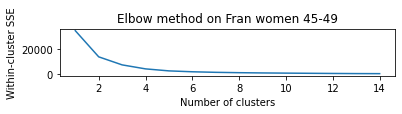

In [344]:
# Aggregation 18-34
mask = (df_women_fran['age'] >= 18) & (df_women_fran['age'] <= 34)
df_women_fran1 = df_women_fran.loc[mask]

#Elbow 18-34
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_fran1)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,1)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Fran women 18-34')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 34-39
mask = (df_women_fran['age'] >= 35) & (df_women_fran['age'] <= 39)
df_women_fran2 = df_women_fran.loc[mask]

#Elbow 35-39
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_fran2)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,2)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Fran women 35-39')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 40-44
mask = (df_women_fran['age'] >= 40) & (df_women_fran['age'] <= 44)
df_women_fran3 = df_women_fran.loc[mask]

#Elbow 40-44
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_fran3)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,3)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Fran women 40-44')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 45-49
mask = (df_women_fran['age'] >= 45) & (df_women_fran['age'] <= 49)
df_women_fran4 = df_women_fran.loc[mask]

#Elbow 45-49
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_fran4)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,4)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Fran women 45-49')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/341195254.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_fran1['cluster_label'] = clustering_wfran1.fit_predict(df_women_fran1[df_women_fran1.columns[1:3]])


[[ 17.94791667 159.375     ]
 [ 67.5        479.5       ]
 [ 71.375      247.5       ]]


Text(0.5, 1.0, 'Clusters of Female Fran time vs Rank 18-34')

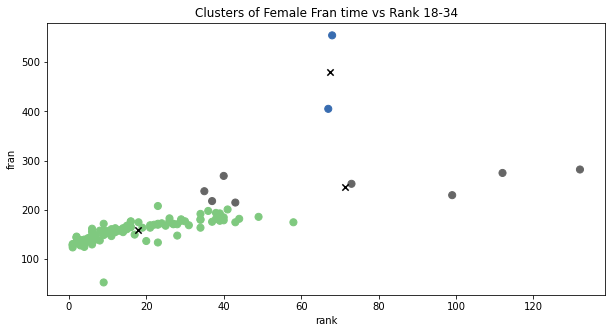

In [345]:
num_clusters = 3 #Define number of clusters

#Age 18-34
#Call clustering algorithm 
clustering_wfran1 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wfran1.fit(df_women_fran1[df_women_fran1.columns[1:3]])
df_women_fran1['cluster_label'] = clustering_wfran1.fit_predict(df_women_fran1[df_women_fran1.columns[1:3]])

centers_wfran1 = clustering_wfran1.cluster_centers_ # Coordinates of cluster centers.
labels_wfran1 = clustering_wfran1.predict(df_women_fran1[df_women_fran1.columns[1:3]]) # Labels of each point
print(centers_wfran1)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_fran1['rank'], y = df_women_fran1['fran'], c=labels_wfran1, s=50, cmap='Accent')
plt.scatter(centers_wfran1[:,0] , centers_wfran1[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Female Fran time vs Rank 18-34")

[[14.38461538 41.23076923]
 [ 2.875      55.375     ]
 [44.         29.        ]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/2192649681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_fran2['cluster_label'] = clustering_wfran2.fit_predict(df_women_fran2[df_women_fran2.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female Fran times vs Rank 35-39')

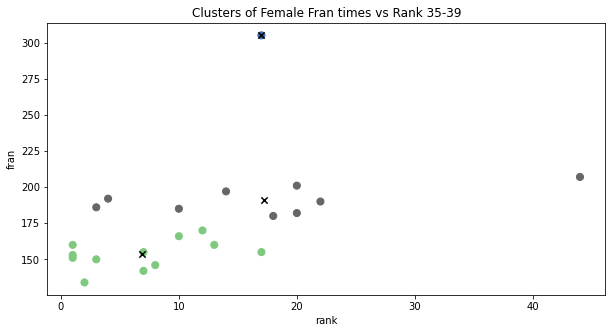

In [346]:
#Age 35-39
#Call clustering algorithm 
clustering_wfran2 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wfran2.fit(df_women_fran2[df_women_fran2.columns[1:3]])
df_women_fran2['cluster_label'] = clustering_wfran2.fit_predict(df_women_fran2[df_women_fran2.columns[1:3]])

centers_wfran2 = clustering_wfran2.cluster_centers_ # Coordinates of cluster centers.
labels_wfran2 = clustering_wfran2.predict(df_women_fran2[df_women_fran2.columns[1:3]]) # Labels of each point
print(centers_wpull2)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_fran2['rank'], y = df_women_fran2['fran'], c=labels_wfran2, s=50, cmap='Accent')
plt.scatter(centers_wfran2[:,0] , centers_wfran2[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Female Fran times vs Rank 35-39")

[[15.29411765 40.23529412]
 [ 3.57142857 52.71428571]
 [ 7.38461538 40.84615385]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/1780844440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_fran3['cluster_label'] = clustering_wfran3.fit_predict(df_women_fran3[df_women_fran3.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female Fran Times vs Rank 40-44')

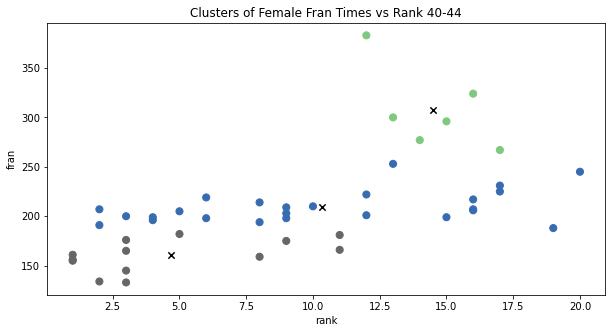

In [347]:
#Age 40-44
#Call clustering algorithm 
clustering_wfran3 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wfran3.fit(df_women_fran3[df_women_fran3.columns[1:3]])
df_women_fran3['cluster_label'] = clustering_wfran3.fit_predict(df_women_fran3[df_women_fran3.columns[1:3]])

centers_wfran3 = clustering_wfran3.cluster_centers_ # Coordinates of cluster centers.
labels_wfran3 = clustering_wfran3.predict(df_women_fran3[df_women_fran3.columns[1:3]]) # Labels of each point
print(centers_wpull3)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_fran3['rank'], y = df_women_fran3['fran'], c=labels_wfran3, s=50, cmap='Accent')
plt.scatter(centers_wfran3[:,0] , centers_wfran3[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Female Fran Times vs Rank 40-44")

[[ 4.3  49.6 ]
 [16.7  37.9 ]
 [11.25 41.25]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/3205134799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_fran4['cluster_label'] = clustering_wfran4.fit_predict(df_women_fran4[df_women_fran4.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female Fran time vs Rank 45-49')

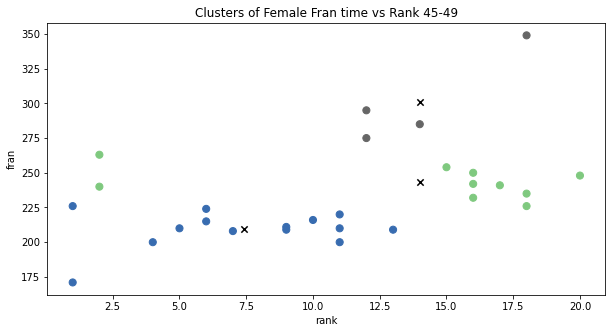

In [348]:
#Age 45-49
#Call clustering algorithm 
clustering_wfran4 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wfran4.fit(df_women_fran4[df_women_fran4.columns[1:3]])
df_women_fran4['cluster_label'] = clustering_wfran4.fit_predict(df_women_fran4[df_women_fran4.columns[1:3]])

centers_wfran4 = clustering_wfran4.cluster_centers_ # Coordinates of cluster centers.
labels_wfran4 = clustering_wfran4.predict(df_women_fran4[df_women_fran4.columns[1:3]]) # Labels of each point
print(centers_wpull4)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_fran4['rank'], y = df_women_fran4['fran'], c=labels_wfran4, s=50, cmap='Accent')
plt.scatter(centers_wfran4[:,0] , centers_wfran4[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('fran')
plt.title("Clusters of Female Fran time vs Rank 45-49")

## Run5k

In [349]:
# Run5k
df_women_run = df_women.loc[:,['age','rank','run5k']]

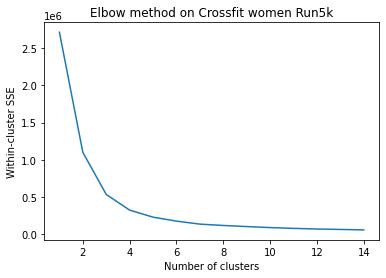

In [350]:
# Elbow method for Female athletes 
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_run)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit women Run5k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### Run5k (All Age Groups)

[[   5.57534247 1215.8630137 ]
 [  23.83018868 1414.67924528]
 [  58.69230769 1609.53846154]
 [  13.75294118 1312.84705882]]


Text(0.5, 1.0, 'Clusters of Female Run5k time vs Rank')

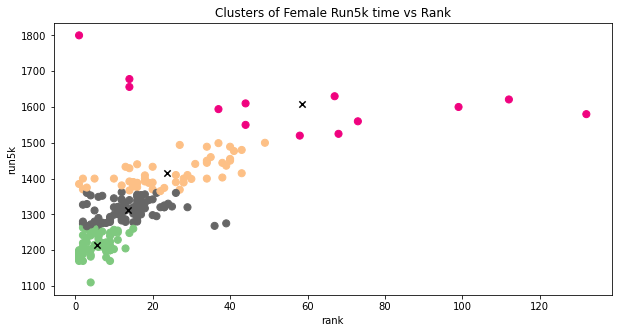

In [351]:
num_clusters = 4 #Define number of clusters

#Call clustering algorithm 
clustering_wrun = KMeans(n_clusters=num_clusters, random_state=2)
clustering_wrun.fit(df_women_run[df_women_run.columns[1:3]])
df_women_run['cluster_label'] = clustering_wrun.fit_predict(df_women_run[df_women_run.columns[1:3]])

centers_wrun = clustering_wrun.cluster_centers_ # Coordinates of cluster centers.
labels_wrun = clustering_wrun.predict(df_women_run[df_women_run.columns[1:3]]) # Labels of each point
print(centers_wrun)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_run['rank'], y = df_women_run['run5k'], c=labels_wrun, s=50, cmap='Accent')
plt.scatter(centers_wrun[:,0] , centers_wrun[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5k')
plt.title("Clusters of Female Run5k time vs Rank")

### Aggregate women by age groups

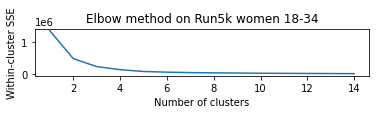

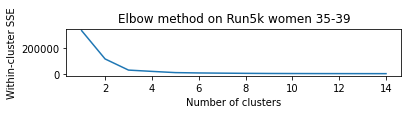

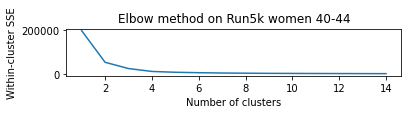

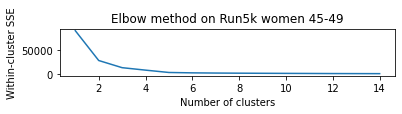

In [352]:
# Aggregation 18-34
mask = (df_women_run['age'] >= 18) & (df_women_run['age'] <= 34)
df_women_run1 = df_women_run.loc[mask]

#Elbow 18-34
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_run1)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,1)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Run5k women 18-34')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 34-39
mask = (df_women_run['age'] >= 35) & (df_women_run['age'] <= 39)
df_women_run2 = df_women_run.loc[mask]

#Elbow 35-39
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_run2)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,2)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Run5k women 35-39')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 40-44
mask = (df_women_run['age'] >= 40) & (df_women_run['age'] <= 44)
df_women_run3 = df_women_run.loc[mask]

#Elbow 40-44
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_run3)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,3)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Run5k women 40-44')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

# Aggregation 45-49
mask = (df_women_run['age'] >= 45) & (df_women_run['age'] <= 49)
df_women_run4 = df_women_run.loc[mask]

#Elbow 45-49
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_run4)
    distortations[k] = kmeans.inertia_
plt.subplot(4,1,4)
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Run5k women 45-49')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[   7.52941176 1228.94117647]
 [  52.16666667 1507.83333333]
 [  19.1875     1355.97916667]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/2076842288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_run1['cluster_label'] = clustering_wrun1.fit_predict(df_women_run1[df_women_run1.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female Run5k vs Rank 18-34')

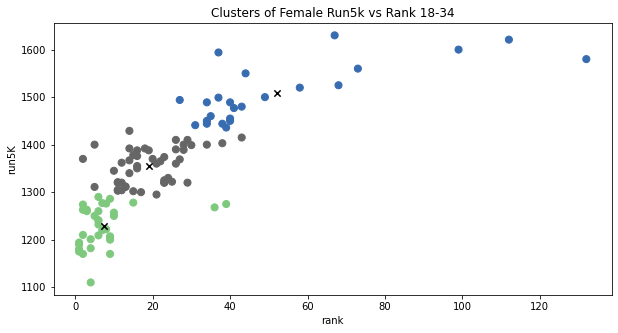

In [353]:
num_clusters = 3 #Define number of clusters

#Age 18-34
#Call clustering algorithm 
clustering_wrun1 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wrun1.fit(df_women_run1[df_women_run1.columns[1:3]])
df_women_run1['cluster_label'] = clustering_wrun1.fit_predict(df_women_run1[df_women_run1.columns[1:3]])

centers_wrun1 = clustering_wrun1.cluster_centers_ # Coordinates of cluster centers.
labels_wrun1 = clustering_wrun1.predict(df_women_run1[df_women_run1.columns[1:3]]) # Labels of each point
print(centers_wrun1)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_run1['rank'], y = df_women_run1['run5k'], c=labels_wrun1, s=50, cmap='Accent')
plt.scatter(centers_wrun1[:,0] , centers_wrun1[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5K')
plt.title("Clusters of Female Run5k vs Rank 18-34")

[[  14.6 1359.9]
 [   5.  1227.4]
 [  29.  1644. ]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/3730408413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_run2['cluster_label'] = clustering_wrun2.fit_predict(df_women_run2[df_women_run2.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female Run 5k vs Rank 35-39')

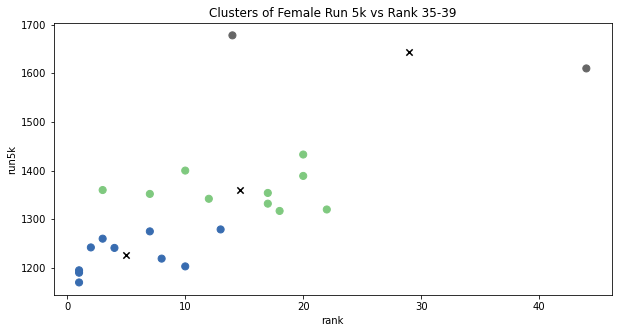

In [354]:
#Age 35-39
#Call clustering algorithm 
clustering_wrun2 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wrun2.fit(df_women_run2[df_women_run2.columns[1:3]])
df_women_run2['cluster_label'] = clustering_wrun2.fit_predict(df_women_run2[df_women_run2.columns[1:3]])

centers_wrun2 = clustering_wrun2.cluster_centers_ # Coordinates of cluster centers.
labels_wrun2 = clustering_wrun2.predict(df_women_run2[df_women_run2.columns[1:3]]) # Labels of each point
print(centers_wrun2)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_run2['rank'], y = df_women_run2['run5k'], c=labels_wrun2, s=50, cmap='Accent')
plt.scatter(centers_wrun2[:,0] , centers_wrun2[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5k')
plt.title("Clusters of Female Run 5k vs Rank 35-39")

[[  12.65 1305.75]
 [   5.35 1208.15]
 [  11.5  1402.25]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/3725049728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_run3['cluster_label'] = clustering_wrun3.fit_predict(df_women_run3[df_women_run3.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female Run5k vs Rank 40-44')

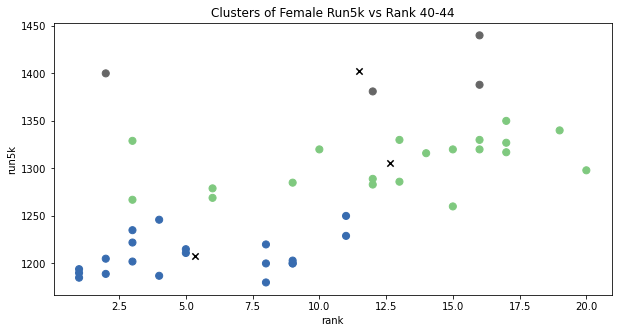

In [355]:
#Age 40-44
#Call clustering algorithm 
clustering_wrun3 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wrun3.fit(df_women_run3[df_women_run3.columns[1:3]])
df_women_run3['cluster_label'] = clustering_wrun3.fit_predict(df_women_run3[df_women_run3.columns[1:3]])

centers_wrun3 = clustering_wrun3.cluster_centers_ # Coordinates of cluster centers.
labels_wrun3 = clustering_wrun3.predict(df_women_run3[df_women_run3.columns[1:3]]) # Labels of each point
print(centers_wrun3)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_run3['rank'], y = df_women_run3['run5k'], c=labels_wrun3, s=50, cmap='Accent')
plt.scatter(centers_wrun3[:,0] , centers_wrun3[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5k')
plt.title("Clusters of Female Run5k vs Rank 40-44")

[[  10.72727273 1300.27272727]
 [   7.1        1224.5       ]
 [  15.85714286 1359.57142857]]


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1695/3125238943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_run4['cluster_label'] = clustering_wpull4.fit_predict(df_women_run4[df_women_run4.columns[1:3]])


Text(0.5, 1.0, 'Clusters of Female run5k vs Rank 45-49')

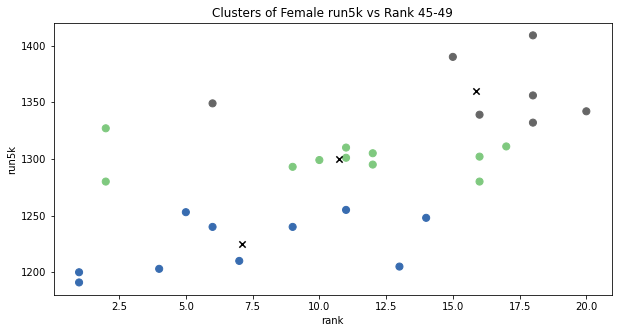

In [356]:
#Age 45-49
#Call clustering algorithm 
clustering_wrun4 = KMeans(n_clusters=num_clusters, random_state=3)
clustering_wrun4.fit(df_women_run4[df_women_run4.columns[1:3]])
df_women_run4['cluster_label'] = clustering_wpull4.fit_predict(df_women_run4[df_women_run4.columns[1:3]])

centers_wrun4 = clustering_wrun4.cluster_centers_ # Coordinates of cluster centers.
labels_wrun4 = clustering_wrun4.predict(df_women_run4[df_women_run4.columns[1:3]]) # Labels of each point
print(centers_wrun4)

# Plot Clusters
plt.figure(figsize=(10, 5))
plt.scatter(x = df_women_run4['rank'], y = df_women_run4['run5k'], c=labels_wrun4, s=50, cmap='Accent')
plt.scatter(centers_wrun4[:,0] , centers_wrun4[:,1] , marker="x", s = 40, color = 'k')
plt.xlabel('rank')
plt.ylabel('run5k')
plt.title("Clusters of Female run5k vs Rank 45-49")